In [1]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Users\\91834\\Downloads\\archive 2\\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


<AxesSubplot:>

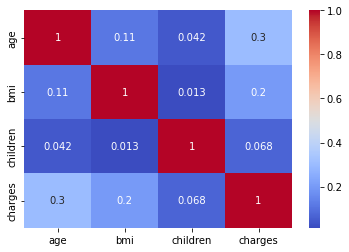

In [7]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation and plot the heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")


In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score



In [9]:
# Assuming df is your DataFrame, and 'target' is your target column
X = df.drop('charges', axis=1)  # Features (remove the target column)
y = df['age']  # Target variable



In [10]:
# Convert categorical columns to numerical (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)  # drop_first=True avoids multicollinearity



In [11]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [12]:
# Scale the features (SVR is sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [13]:
# Create the SVR model
svr = SVR()



In [14]:
# Train the model
svr.fit(X_train_scaled, y_train)



SVR()

In [15]:
# Predict on both training and testing sets
y_train_pred = svr.predict(X_train_scaled)
y_test_pred = svr.predict(X_test_scaled)



In [16]:
# Calculate R^2 score (train and test)
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)



In [17]:
# Print the scores
print(f"Training R^2 Score: {train_score}")
print(f"Testing R^2 Score: {test_score}")

Training R^2 Score: 0.9759871318429487
Testing R^2 Score: 0.9681642936154689


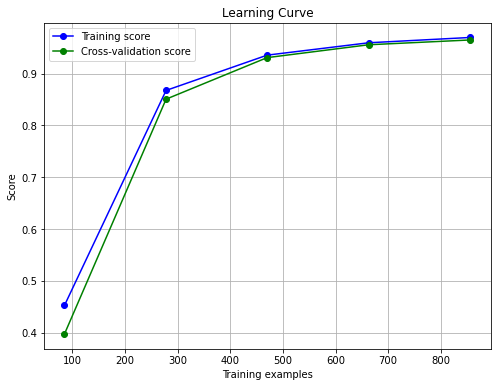

In [18]:
from sklearn.model_selection import learning_curve

# Get learning curve data
train_sizes, train_scores, test_scores = learning_curve(svr, X_train_scaled, y_train, cv=5)

# Calculate mean and std of train/test scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()


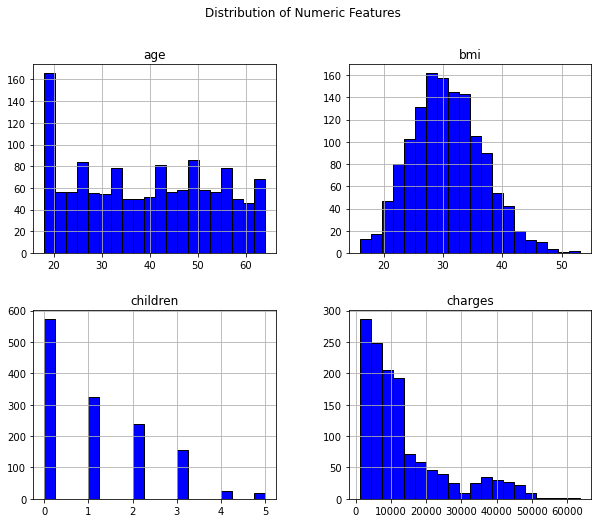

In [19]:
# Histogram of all numeric columns
df.hist(bins=20, figsize=(10, 8), color='blue', edgecolor='black')
plt.suptitle('Distribution of Numeric Features')
plt.show()
